In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from database import surveys
import pysm3
import pysm3.units as u
import healpy as hp


In [2]:
lb_table = surveys().get_table_dataframe('LITEBIRD_V1')
fg_dir = '/global/cscratch1/sd/lonappan/S4BIRD/FG'
fg_str = "s1d1"
nside = 2048

In [3]:
freq = lb_table.frequency.values

In [4]:
sky = pysm3.Sky(nside=nside, preset_strings=list(map(''.join, zip(*[iter(fg_str)]*2))))

In [5]:
os.makedirs(fg_dir,exist_ok=True)
for v in freq:
    fname = os.path.join(fg_dir,f"{fg_str}_{int(v)}.fits")
    if not os.path.isfile(fname):
        print(f"Producing Maps at {v} GHz")
        maps = sky.get_emission(v * u.GHz)
        maps = maps.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(v*u.GHz))
        hp.write_map(fname, maps.value,dtype=np.float64)
        print(f"Saved {fname}")
    else:
        print(f"{fname} already exists")
        continue

Producing Maps at 40.0 GHz


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Saved /global/cscratch1/sd/lonappan/S4BIRD/FG/s1d1_40.fits
Producing Maps at 50.0 GHz
Saved /global/cscratch1/sd/lonappan/S4BIRD/FG/s1d1_50.fits
Producing Maps at 60.0 GHz
Saved /global/cscratch1/sd/lonappan/S4BIRD/FG/s1d1_60.fits
Producing Maps at 68.0 GHz
Saved /global/cscratch1/sd/lonappan/S4BIRD/FG/s1d1_68.fits
Producing Maps at 78.0 GHz
Saved /global/cscratch1/sd/lonappan/S4BIRD/FG/s1d1_78.fits
Producing Maps at 89.0 GHz
Saved /global/cscratch1/sd/lonappan/S4BIRD/FG/s1d1_89.fits
Producing Maps at 100.0 GHz
Saved /global/cscratch1/sd/lonappan/S4BIRD/FG/s1d1_100.fits
Producing Maps at 119.0 GHz
Saved /global/cscratch1/sd/lonappan/S4BIRD/FG/s1d1_119.fits
Producing Maps at 140.0 GHz
Saved /global/cscratch1/sd/lonappan/S4BIRD/FG/s1d1_140.fits
Producing Maps at 166.0 GHz
Saved /global/cscratch1/sd/lonappan/S4BIRD/FG/s1d1_166.fits
Producing Maps at 195.0 GHz
Saved /global/cscratch1/sd/lonappan/S4BIRD/FG/s1d1_195.fits
Producing Maps at 235.0 GHz
Saved /global/cscratch1/sd/lonappan/S4BIRD/

In [6]:
dnside = 512

def get_fg(v):
    fname = os.path.join(fg_dir,f"{fg_str}_{int(v)}.fits")
    return hp.ud_grade(hp.read_map(fname,(0,1,2)), dnside)

def test_fg(v):
    maps_sky = sky.get_emission(v * u.GHz)
    maps_sky = maps_sky.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(v*u.GHz))
    alms = hp.map2alm(hp.ud_grade(maps_sky.value,dnside))
    maps_saved = get_fg(v)
    alms_saved = hp.map2alm(maps_saved)
    plt.figure(figsize=(8,8))
    plt.loglog(hp.alm2cl(alms[0]),label='Sky T')
    plt.loglog(hp.alm2cl(alms_saved[0]),label='Saved T')
    plt.loglog(hp.alm2cl(alms[1]),label='Sky E')
    plt.loglog(hp.alm2cl(alms_saved[1]),label='Saved E')
    plt.loglog(hp.alm2cl(alms[2]),label='Sky B')
    plt.loglog(hp.alm2cl(alms_saved[2]),label='Saved B')
    plt.legend()

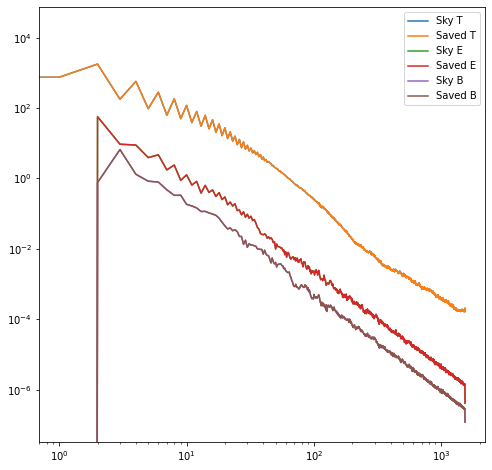

In [7]:
test_fg(freq[0])